<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Метрика этого проекта RMSE (Root Mean Squared Error) является одной из наиболее распространенных метрик для оценки качества моделей машинного обучения. Она измеряет среднюю ошибку модели в прогнозировании целевых значений.
    
Я заметил, что в этом проекте ты несколько раз путаешь название этой метрики (не MSE, не MAE)
    
Вот простое объяснение этой метрики:
    
В простых словах, RMSE означает среднее значение квадратных отклонений между прогнозируемыми значениями модели и реальными значениями целевой переменной. Чем меньше значение RMSE, тем лучше модель.

RMSE можно интерпретировать как среднее расстояние между прогнозами модели и реальными значениями. Она измеряется в тех же единицах, что и целевая переменная, что делает ее удобной для понимания и интерпретации результатов модели.

Например, если мы используем модель для прогнозирования стоимости недвижимости, RMSE покажет, на сколько денег в среднем наша модель ошибается в своих прогнозах. Если RMSE равна 50 000, это означает, что наша модель ошибается в среднем на 50 000 долларов при прогнозировании стоимости недвижимости.
</div>

Привет, Александр!)
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### Опсание проекта  
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 
### Импорт библиотек

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik.report import plot_correlation_matrix

from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import (OrdinalEncoder, 
                                   OneHotEncoder,
                                   StandardScaler,
                                  LabelEncoder)
from sklearn.compose import make_column_transformer

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

### Загрузка датафрейма и предопобработка данных

In [5]:
try:
    df = pd.read_csv('./datasets/autos.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

1. Названия столбцов стоит превести к pep8
2. Дата скачивания ну бедт участвовать в модели, поэтому можно не менять формат на дату.
3. Price - целевой целочисленный признак, нас это устраивает, но возможно входе разрабоки модели его придется привести к формату Float
4. Datecreated - дата создания анкеты, нас мало интересует, возможно он сможет пригодиться, если мы увидим странные данные в старых анкетах, они могут быть не актуальны и в этом случае можно было бы отбросить часть старых данных.
5. NumberOfPictures - Мы не хотим, чтобы предсказание цены учитывало "Качество создания объявления" (я бы уточнил у заказчика) Кол-во фото скорее всего увеличивает конверсию, но это не является критерием стоимости самого автомобиля.
6. Почтовый индекс в модели участвовать не будет. То же самое с полем RegistrationMonth.
7. Lastseen - аналогично

In [7]:
#Переименование столбцов:
df.columns = ['date_published', 'price', 'vehicle_type', 
              'registration_year', 'gearbox', 'power', 
              'model', 'kilometer', 'month_registration', 
              'fuel_type', 'brand', 'repaired', 'date_created', 
              'pictures', 'postal_code', 'lastseen']

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Работать с такими названиями гораздо удобнее)
</div>

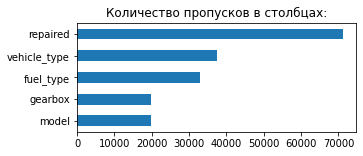

In [8]:
df.isna().sum()[df.isna().sum()>0].sort_values().plot(kind ='barh', figsize=(5,2))
plt.title('Количество пропусков в столбцах:')
plt.show()

* Первый осмотр показывает, что поле "Модель" мы вряд ли сможем заполнить, поэтому скорее всего придется по нему отбросить пропуски. Возможно эти же поля не содержат в себе Gearbox.
* В столбце repaired возможно пропуски означают отсутствие
* Столбец vehicle_type и fuel_type для определенных моделей может быть всегда один. 

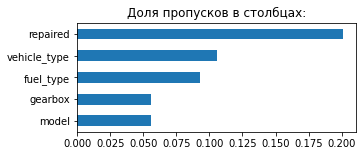

In [9]:
df.isna().mean()[df.isna().mean()>0].sort_values().plot(kind ='barh', figsize=(5,2))
plt.title('Доля пропусков в столбцах:')
plt.show()

В процентном соотношении количество пропусков доходит до 20%, что критично.
Можно попробовать восстановить поля "vehicle_type" Например, если модель имеет только один тип кузова - проставить такой везде.
То же самое можно сделать с Fuel type.

In [10]:
#Сохраним размер df перед началом преобразований.
df_start = len(df)
#Т.к. мы часто будем смотреть сколько данных отбросили - сделаем функцию, которая будет считать потери
def lost_values():
    display('Доля отбросанных значений {:2.2%}'.format(1-len(df)/df_start))

In [11]:
df.duplicated().sum()

4

In [12]:
#Отбросим 4 явных дубликата
df = df.drop_duplicates()
lost_values()

'Доля отбросанных значений 0.00%'

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

От явных дубликатов избавились 👍
</div>

In [13]:
# Перед тем, как удалять строки с na стоит посмотреть наличие аномалий, возможно часть na откинется из-за аномальных значений.
# Сразу выделим только те столбцы, которые можно будет использовать в модели
df = df[['vehicle_type','registration_year','gearbox',
                'power', 'model', 'fuel_type', 'brand', 'repaired', 'price']]
# Все столбцы с пропусками понадобятся нам в модели.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

In [14]:
display(df.describe(include='all'))
pd.concat([df.describe(),df.quantile([0.01,0.02,0.98,0.99], numeric_only= True)]).style.format('{:.2f}')

,vehicle_type,registration_year,gearbox,power,model,fuel_type,brand,repaired,price
count,316875,354365.000000,334532,354365.000000,334660,321470,354365,283211,354365.000000
unique,8,NaN,2,NaN,250,7,40,2,NaN
top,sedan,NaN,manual,NaN,golf,petrol,volkswagen,no,NaN
freq,91457,NaN,268249,NaN,29232,216349,77012,247158,NaN
mean,NaN,2004.234481,NaN,110.093816,NaN,NaN,NaN,NaN,4416.679830
std,NaN,90.228466,NaN,189.851330,NaN,NaN,NaN,NaN,4514.176349
min,NaN,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,1999.000000,NaN,69.000000,NaN,NaN,NaN,NaN,1050.000000
50%,NaN,2003.000000,NaN,105.000000,NaN,NaN,NaN,NaN,2700.000000
75%,NaN,2008.000000,NaN,143.000000,NaN,NaN,NaN,NaN,6400.000000


,registration_year,power,price
count,354365.00,354365.00,354365.00
mean,2004.23,110.09,4416.68
std,90.23,189.85,4514.18
min,1000.00,0.00,0.00
25%,1999.00,69.00,1050.00
50%,2003.00,105.00,2700.00
75%,2008.00,143.00,6400.00
max,9999.00,20000.00,20000.00
0.01,1980.00,0.00,0.00
0.02,1987.00,0.00,0.00


1. Есть поля с 0 ценой, стоит их отбросить, т.к. цену мы сможем только предсказывать. Для обучения они не нужны.
2. Есть несколько полей с аномальным годом выпуска, их тоже нужно будет отбросить.
3. В поле power есть значение 20 000

Итого:
1. Отбрасываем года < 1980
2. По мощности и цене построим гистограмму, чтобы понять что нужно отбросить с нижней стороны.

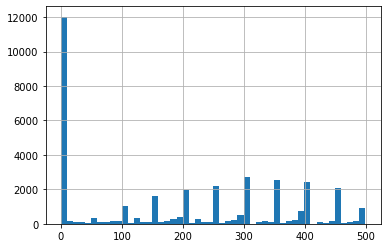

In [15]:
df[df['price']<500]['price'].hist(bins = 50)
plt.show()

На бюджетные авто в основном ставят круглый ценник. Распределение по ценовым сегментам имеет схожу форму, поэтому скорее всего так и есть.
Отбросим значения менее 50 долларов.

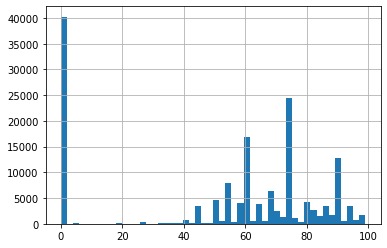

In [16]:
df[df['power']<100]['power'].hist(bins = 50)
plt.show()

Тут явно видно, что менее 20 лошадиных сил - почти всегда нули. 

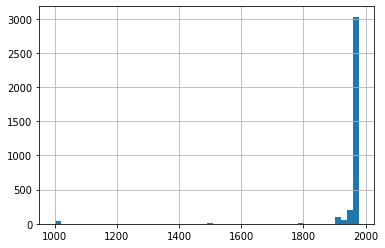

In [17]:
df[df['registration_year']<1980]['registration_year'].hist(bins = 50)
plt.show()

Ситуация ясна - небольшое количество 1000 годов. 

In [18]:
# Убираем аномалии:
df = df[(df['price'] > 50) & 
        (df['power'] > 20) &
        (df['registration_year']>1950) & (df['registration_year']<2021)]
lost_values()

'Доля отбросанных значений 13.71%'

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

С аномальными значениями успешно справились 👍
</div>

Много, но мы не сможем их корректно зааполнить. Обнадеживает, что датафрейм допольно большой и нам хватит данных для качественного обучения.

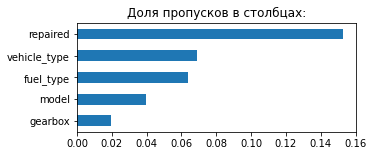

In [19]:
df.isna().mean()[df.isna().mean()>0].sort_values().plot(kind ='barh', figsize=(5,2))
plt.title('Доля пропусков в столбцах:')
plt.show()

* Все равно осталось довольно много пропусков, которые мы уже не можем удалять.
* Модель восстановить будет невозможно, заменим ее на unknown
* Отсальные поля будем заполнять популярными значениями для модели.

In [20]:
df['model'] = df['model'].fillna('unknown')

mode_columns = ['repaired','vehicle_type','fuel_type','gearbox']

for col in mode_columns:
    df[col] = df.groupby('model')[col].transform(lambda x:x.fillna((x.mode()[0])))

df.isna().sum()

vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
fuel_type            0
brand                0
repaired             0
price                0
dtype: int64

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Пропуски успешно заполнены 👍 Модели теперь не будут капризничать)
</div>

In [21]:
print (df_start, len(df))
lost_values()


354369 305769


'Доля отбросанных значений 13.71%'

#### Выводы по итогу предобработки данных:
    1. Изначально мы получили датафрейм, в которых было большое количество пропусков. По не которым полям доля доходила до 20%.
    2. Часть данных была заполнена некорректно, 13,7% данных были сверх реальных цифр, поэтому мы их сразу исключилий.
    3. В оставшихся полях пропуски мы заполнили модой для модели машины, что вполне допустимо в этой ситуации.


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Данные успешно обработаны 👍
</div>

### Построение моделей

Т.к. целевой столбец - числовой и нам надо будет считать RMSE будем использовать следующие модели для предсказания цены:  
    1. LinearRegression - для обычной линейной регрессии  
    2. DecisionTreeRegressor - для обычной линейной регрессии  
    3. LightGBM - для градиентного бустинга  
    4. CatBoost - для градиентного бустинга  



#### Подготовка выборок для обучения:

In [22]:
X = df.drop('price', axis=1)
y = df['price']

In [23]:
display(X.info())
# Числовые столбцы: registration_year, power
# Категориальные столбцы: vehicle_type, gearbox, model, fuel_type, brand, repaired

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305769 entries, 1 to 354368
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicle_type       305769 non-null  object
 1   registration_year  305769 non-null  int64 
 2   gearbox            305769 non-null  object
 3   power              305769 non-null  int64 
 4   model              305769 non-null  object
 5   fuel_type          305769 non-null  object
 6   brand              305769 non-null  object
 7   repaired           305769 non-null  object
dtypes: int64(2), object(6)
memory usage: 21.0+ MB


None

In [24]:
cat_columns = X.select_dtypes(include='object').columns.to_list()
digital_columns = X.drop(cat_columns,axis = 1).columns.to_list()
print (cat_columns)
print (digital_columns)
df.head()

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']
['registration_year', 'power']


,vehicle_type,registration_year,gearbox,power,model,fuel_type,brand,repaired,price
1,coupe,2011,manual,190,unknown,gasoline,audi,yes,18300
2,suv,2004,auto,163,grand,gasoline,jeep,no,9800
3,small,2001,manual,75,golf,petrol,volkswagen,no,1500
4,small,2008,manual,69,fabia,gasoline,skoda,no,3600
5,sedan,1995,manual,102,3er,petrol,bmw,yes,650


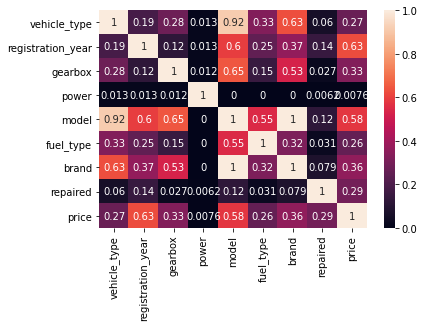

In [25]:
phik_overview = df.phik_matrix(interval_cols=['registration_year','power','price'])
sns.heatmap(phik_overview,annot=True)
plt.show()


* C целевым столбцом коррелируют дата регистрации и модель, что логично и для нас не критично.
* А вот корреляция цены и года регистрации, а также модели и коробки передач плохо для линейной регрессии, что скорее всего повлияет на качество модели.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12345)

# Для корректной работы бибилиотек в столбце признаков выделим категориальные признаки
X_train[cat_columns] = X_train[cat_columns].astype("category")
X_test[cat_columns] = X_test[cat_columns].astype("category")

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

### Обучение различных моделей

#### LIGHT GBM

In [27]:
%%time
#Из-за проблем с сервером яндекс, пришлось урезать кол-во данных для обучения и параметров в GridSearch, 
#Локально все выполняется без проблем.
model_lgbm = LGBMRegressor(random_state=12345) 

lgbm_grid = {'learning_rate': [0.1],
             'max_depth': [4],
             'num_leaves': [200]}

grid_lgbm = GridSearchCV(estimator=model_lgbm, 
                     param_grid = lgbm_grid, 
                     cv = 2, 
                     n_jobs=-1,
                     scoring='neg_root_mean_squared_error')


grid_lgbm.fit(X_train.head(10000), y_train.head(10000))

res_lgbm = -grid_lgbm.best_score_
params_lgbm = grid_lgbm.best_params_

print ('Лучший результат:', res_lgbm)
print ('Лучшие параметры:', params_lgbm)


Лучший результат: 2054.6611138613134
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4, 'num_leaves': 200}
CPU times: user 16.3 s, sys: 112 ms, total: 16.4 s
Wall time: 16.4 s


* Хорошее MSE (по условию задачи требуется менее 2500)
* Обучение проходило довольно долго - 14с.

#### CAT BOOST

In [28]:
%%time
catboost = CatBoostRegressor(logging_level = 'Silent',
                             cat_features = cat_columns,
                             iterations=100
                            )
cb_grid = {'learning_rate': [0.03, 0.1],
       'depth': [10],
       'l2_leaf_reg': [1, 3, 5, 7, 9]}
grid  = GridSearchCV(estimator=catboost, 
                     param_grid = cb_grid, 
                     cv = 2, 
                     n_jobs=-1,
                     scoring='neg_root_mean_squared_error')

grid.fit(X_train, y_train)

res_cat = -grid.best_score_

print ('Лучший результат:', res_cat)
print ('Лучшие параметры:', grid.best_params_)

Лучший результат: 1826.7641282448699
Лучшие параметры: {'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
CPU times: user 2min 19s, sys: 937 ms, total: 2min 20s
Wall time: 2min 33s


* MSE хуже, чем в GBM, зато время обработки - в 3 раза быстрее, чем в Light GBM

#### Линейная регрессия
Т.к. классические методы не работают с незакодированными категориальными признаками. Сделаем для них отдельные признаки

In [29]:
ord_encoder = OrdinalEncoder()
X_train_coded = X_train.copy()
X_train_coded[cat_columns] = ord_encoder.fit_transform(X_train[cat_columns])
X_test_coded = X_test.copy()
X_test_coded[cat_columns] = ord_encoder.fit_transform(X_test[cat_columns])
X_train_coded.head()

,vehicle_type,registration_year,gearbox,power,model,fuel_type,brand,repaired
244440,7.0,1998,1.0,136,42.0,6.0,24.0,1.0
8153,5.0,2012,0.0,70,106.0,6.0,32.0,0.0
179129,0.0,2006,0.0,150,237.0,2.0,20.0,0.0
295443,7.0,2000,1.0,83,166.0,6.0,22.0,0.0
184607,0.0,2008,1.0,75,50.0,2.0,5.0,0.0


In [30]:
%%time 
#Посмотрим как отработает модель с кодированием Ordinal
model_lr = LinearRegression()
model_lr.fit(X_train_coded,y_train)
y_pred = model_lr.predict(X_test_coded)

res_lr = mean_squared_error(y_pred, y_test)**0.5
print ('MSE с помощью классической линейной регрессии = {:2.2f}'.format(res_lr))


MSE с помощью классической линейной регрессии = 3790.23
CPU times: user 89.3 ms, sys: 56.2 ms, total: 146 ms
Wall time: 119 ms


* Как и ожидалось линейная регрессия отработала плохо по 2 причинам.
    1. Между некоторыми признаками есть сильная корреляция.
    2. Метод кодирования Ordinal является не самым лучшим, т.к. он фактически делаем измеримую разницу между названиями, хотя по факту этого быть не должно.
* Попробуем дать линейной регрессии второй шанс и использовать метод кодирования OHE. Также применим StandartScaler к числовым столбцам

In [31]:
# Создадим трансформер, который будет обрабатывать данные. Количественные - с помощью StandartScaler, качественные - OHE
X_train_ohe = X_train.copy()

col_transformer_ridge = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        cat_columns
    ),
    (
        StandardScaler(), 
        digital_columns
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)

X_train_ohe = pd.DataFrame.sparse.from_spmatrix(
    col_transformer_ridge.fit_transform(X_train_ohe),
    columns=col_transformer_ridge.get_feature_names_out()
)
X_train_ohe.head()

,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_wagon,gearbox_manual,model_145,model_147,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_yes,registration_year,power
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.778733,0.065360
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.263930,-0.294735
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.388503,0.141744
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486924,-0.223807
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680312,-0.267455


In [32]:
# трансформируем тестовую выборку
X_test_ohe = X_test.copy()
X_test_ohe = pd.DataFrame.sparse.from_spmatrix(
    col_transformer_ridge.transform(X_test_ohe),
    columns=col_transformer_ridge.get_feature_names_out()
)
X_test_ohe.head()

,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_wagon,gearbox_manual,model_145,model_147,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_yes,registration_year,power
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.555739,0.174480
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.778733,-0.267455
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.195115,0.141744
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.632829,-0.349295
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.263930,-0.011023


Благодаря конутруктору количество столбцов совпадает в тестовой и обучающей выборках не смотря на то, что уникальные столбцы в некоторых столбцах не повторяются.

In [33]:
%%time 
#Посмотрим как отработает модель с кодированием OHE
model_lr = LinearRegression()
model_lr.fit(X_train_ohe,y_train)
y_pred = model_lr.predict(X_test_ohe)
res_lr = mean_squared_error(y_pred, y_test)**0.5
print ('MSE с помощью классической линейной регрессии = {:2.2f}'.format(res_lr))

MSE с помощью классической линейной регрессии = 3221.20
CPU times: user 12.6 s, sys: 14.9 s, total: 27.5 s
Wall time: 27.6 s


Результат стал значительно лучше, но все равно не удовлетворяет требования заказчика.

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Кодировать данные стоит после разбиения)

Кодирование переменных до разделения на обучающий и тестовый наборы может привести к "утечке данных". Это происходит потому, что кодирование во всем наборе данных, включая тестовый набор, может позволить модели запомнить целевые значения в тестовом наборе, которые не являются репрезентативными для реальных данных, с которыми модель еще не сталкивалась. Это может привести к чрезмерной подгонке и дать слишком оптимистичную оценку эффективности модели. Важно сначала разделить данные на обучающий и тестовый наборы, а затем выполнить кодирование, чтобы предотвратить утечку данных.
</div>
<font color = "blue"> Исправил. Кодирование сделано отдельно для тестовой и тренировочной выборок.

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Для прямого кодирования также есть вариант с fit и transform - OneHotEncoder из sklearn.
  
Вот блокнот с объяснением OneHotEncoder, make_column_transformer и make_pipeline:

https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing
</div>
<font color = "blue"> Супер, спасибо за эту ссылку. Изначально у меня не получалось сделать OHE, т.к. уникальные значения в тестовой выборке не совпадали с тренировочной. Применив трансформер, все сработало четко.

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

#### Дерево решений

In [34]:
%%time
model_dr = DecisionTreeRegressor(random_state=12345) 
param_grid_dr = {
    'max_depth': [3,9,14,16],
    'max_features': [3,9,12]
    
}
gs_dr = GridSearchCV(
    model_dr, 
    param_grid=param_grid_dr, 
    scoring='neg_root_mean_squared_error', 
    cv = 5,
    n_jobs=-1
)

gs_dr.fit (X_train_coded, y_train)

res_dr = -gs_dr.best_score_
print ('Лучшие параметры:',gs_dr.best_params_)
print ('Best MSE score: ', res_dr)

Лучшие параметры: {'max_depth': 16, 'max_features': 9}
Best MSE score:  1933.4534660655645
CPU times: user 17 s, sys: 0 ns, total: 17 s
Wall time: 17.1 s


* А вот Дерево решений дало неплохое качество с высокой скоростью.
* MSE получилось 1910, что ниже чем, в CAT boost и выше, чем в LGB.
* Но здесь стоит отметить, что мы не подбирали гиперпараметры циклом. Если бы мы оставили тут цикл например для MAX DEPth, время обучения увеличилось бы в n - раз.

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Для моделей, основанных на деревьях решений, лучше использовать порядковое кодирование (OrdinalEncoder). Это должно ускорить их работу. Так как при большом количестве признаков, модель будет долго искать оптимальный сплит.
</div>
<font color = "blue"> Готово, для дерева решений был применен Ordinal кодер.

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Стоит добавить оптимизацию (подбор гиперпараметров) хотя бы для одной модели.
    
В обучении нужно использовать кросс-валидацию, если у тебя всего две выборки.

Можешь подбор гиперпараметров выполнить через GridSearchCV / RandomizedSearchCV ?)

Либо можешь разделить данные на три выборки, и для обучения и анализа моделей использовать валидационную выборку.
</div>
<font color = "blue">Сделал через GridSearch для всех моделей. Но тут возникла сложность. Catboost стал очень долго обучаться при подборе гиперпараметров. Уменьшил кол-во итераций, стало терпимо. Если есть хорошая ссылка на ноутбук по настройки кэтбуста - был бы очень благодарен.

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
    
Вот пример обучения модели:
</div>

```python
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Загрузите данные для обучения модели
data = pd.read_csv('your_data.csv')

# Разделите данные на признаки и целевую переменную
X = data.drop('target_variable', axis=1)
y = data['target_variable']

# Определите модель CatBoost
model = CatBoostRegressor()

# Определите сетку гиперпараметров, которые вы хотите настроить
param_grid = {'iterations': [100, 500, 1000],
              'learning_rate': [0.01, 0.05, 0.1],
              'depth': [4, 6, 8]}

# Используйте GridSearchCV для настройки модели CatBoost с помощью сетки гиперпараметров
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(X, y)

# Выведите лучшие гиперпараметры и метрику
print(f'Лучшие гиперпараметры: {grid_result.best_params_}')
print(f'Точность на кросс-валидации: {grid_result.best_score_}')
```

## Анализ моделей

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>
    
Анализ моделей не должен включать тестовую выборку. Тестовая выборка используется в самом конце - в финальном тестировании лучшей модели. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.

Если валидационной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_train)
</div><font color = "blue"> Исправил, теперь на стадии обучения тестовая выборка не участвует нигде.

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [35]:
results = pd.DataFrame(data=[[16.1,res_lgbm],[28.3,res_cat],[2.12,res_lr],[0.93,res_dr]],
                       index=['LGBM','CAT','Линейная регрессия','Дерево решений'],
                       columns=['Время обучения (сек)', 'MSE']).style.format('{:.2f}')
results

,Время обучения (сек),MSE
LGBM,16.10,2054.66
CAT,28.30,1826.76
Линейная регрессия,2.12,3221.20
Дерево решений,0.93,1933.45


На теущий момент сравнение не совсем корректно, ведь для мы использовали подбор параметров, но после передачи модели в экслуатацию мы можем не осуществлять эту процедуру и взять лучшие, которые мы определили ранее.
Измерим время обучения каждой из 3 моделей без подбора:

In [36]:
%%time
model_lgbm_speed = LGBMRegressor(learning_rate = 0.1, 
                                 max_depth = 10, 
                                 num_leaves = 250,
                                 random_state = 12345)
model_lgbm_speed.fit(X_train,y_train)
print()



CPU times: user 2min 48s, sys: 1.27 s, total: 2min 49s
Wall time: 2min 50s


In [37]:
%%time
model_cat_speed = CatBoostRegressor(logging_level = 'Silent',
                             cat_features = cat_columns,
                             iterations=100,
                             depth = 10,
                             l2_leaf_reg = 1,
                             learning_rate = 0.1)
model_cat_speed.fit(X_train,y_train)
print()


CPU times: user 11.6 s, sys: 54.1 ms, total: 11.6 s
Wall time: 12.4 s


In [38]:
%%time
model_lr_speed = LinearRegression()
model_lr_speed.fit(X_train_ohe,y_train)
print()


CPU times: user 13.3 s, sys: 16.9 s, total: 30.2 s
Wall time: 30.1 s


In [39]:
%%time
model_dr_speed = DecisionTreeRegressor(max_depth=16,
                                       max_features = 9,
                                       random_state=12345) 
model_dr_speed.fit(X_train_ohe,y_train)
print()


CPU times: user 908 ms, sys: 47.2 ms, total: 955 ms
Wall time: 984 ms


In [40]:
results = pd.DataFrame(data=[[11.9,res_lgbm],[10.6,res_cat],[40.3,res_lr],[0.88,res_dr]],
                       index=['LGBM','CAT','Линейная регрессия','Дерево решений'],
                       columns=['Время обучения (сек)', 'MSE']).style.format('{:.2f}')
results

,Время обучения (сек),MSE
LGBM,11.90,2054.66
CAT,10.60,1826.76
Линейная регрессия,40.30,3221.20
Дерево решений,0.88,1933.45


Мы видим, что для данной задачи отлично подходит модель дерева решений, которая показала MSE 1933, что сопоставимо с работой более сложных моделей. При это из-за простоты и меньшего количества итераций использовать ее считаю оптимальным вариантом.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Приятно было бы видеть результаты в информативной таблице
</div><font color = "blue"> Готово, таблицу добавил

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

## Тестирование лучшей модели

In [41]:
# При тестирования дерева решений на тестовой выборке, результат получился не удовлетворительным, поэтому
# я решил остановиться на модели Catboost
# Протестируем выбранную модель на тестовой выборке
y_pred = model_cat_speed.predict(X_test)
mse_test = mean_squared_error(y_pred, y_test)**0.5
print ('Результат модели на тестовой выборке',round(mse_test))

Результат модели на тестовой выборке 1826


<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

После анализа моделей нужно порекомендовать заказчику одну модель на основе его критериев и провести на ней финальное тестирование.
    
Лучше в обучении и анализе не использовать тестовую выборку. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Чтобы все было ясно, напишу конкретный план (структуру) обучения и анализа моделей:

1. Обучение моделей. В обучении нужно рассмотреть хотя бы одну простую модель и один бустинг. Подбор гиперпараметров нужно провести хотя бы одной модели. Тут есть два варианта:
    - без валидационной выборки. Здесь нужно подбирать гиперпараметры с помощью кросс-валидации (GridSearchCV, RandomizedSearchCV или вручную (cross_val_score));
    - валидационная выборка есть. Здесь можно не использовать кросс-валидацию и подбирать гиперпараметры вручную.  
2. Анализ моделей. После нахождения лучших гиперпараметров стоит измерить время обучения, предсказания и RMSE. Тут тоже есть два варианта:
    - без валидационной выборки. RMSE на кросс-валидации. Время обучения = время model.fit(X_train). Время предсказания  = model.predict(X_train);
    - валидационная выборка есть. RMSE на validation. Время обучения = время model.fit(X_train). Время предсказания = время model.predict(X_valid).  
    
    После этого напиши вывод по анализу (можешь также результаты моделей занести в общую таблицу) и посоветуй заказчику одну модель на основе его критериев;
3. Тестирование. Рассчитай финальную метрику лучшей модели на тестовой выборке (до этого тестовая выборка нигде не должна использоваться!). RMSE должно быть меньше 2500. Если метрика не дотягивает, попробуй исправить мои замечания, также можешь потюнить гиперпараметры (на этапе обучения моделей, не на тестовой выборке!)
</div><font color = "blue"> Дуолан, хочу поблагодарить за это ревью. Именно тут я понял как работает Гридсерч (давно планировал его освоить) и кросс-валидация. Понимаю, что еще есть большой резерв роста в плане настроек моделей. Хочу поблагодарить за детальные комментарии и качественный контент в виде ссылок. С точки зрения полезности одно из лучших ревью за все время.

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Рад, что ревью оказалось полезным)
</div>

### Итоговые выводы  
1. В первой части мы детально изучили датафрейм. Привели их к формату PEP8
2. В ходе предобработки удалили дубликаты, заполнили пропуски, где это возможно.
3. Далее разделили данные на обучающую и тестовую выборки и на этих данных обучили 4 модели:
   1. Градиентный бустинг модель Light - GBM - оказалась самой точной, но не самой быстрой*.
   2. Градиентный бустинг модель CAT - GBM - отработала быстрее всего с хорошей точностью*.
   3. Классицеская линейная регрессия - отработала с неудовлетворительным уровнем точности с длительным временем обучения.
   4. Дерево решений. Без учета перебора гиперпараметров отработала быстро с хорошим уровнем точности.
4. Для каждой модели рассчитали МSЕ
5. Для линейных моделей мы использовали 2 вида кодирования категориальных признаков - OHE и Ordinal
6. По итогам обучения мы определили лучшие параметры с помощью метода Gridsearch.
7. П.6 дал на возможность определить лучшие параметры и мы смогли измерить время обучения для каждой из моделей.
8. В итоге мы определились с моделью и выбрали Catboost. Она обладает дастаточно высокой точностью и оптимальным временем обучения.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"